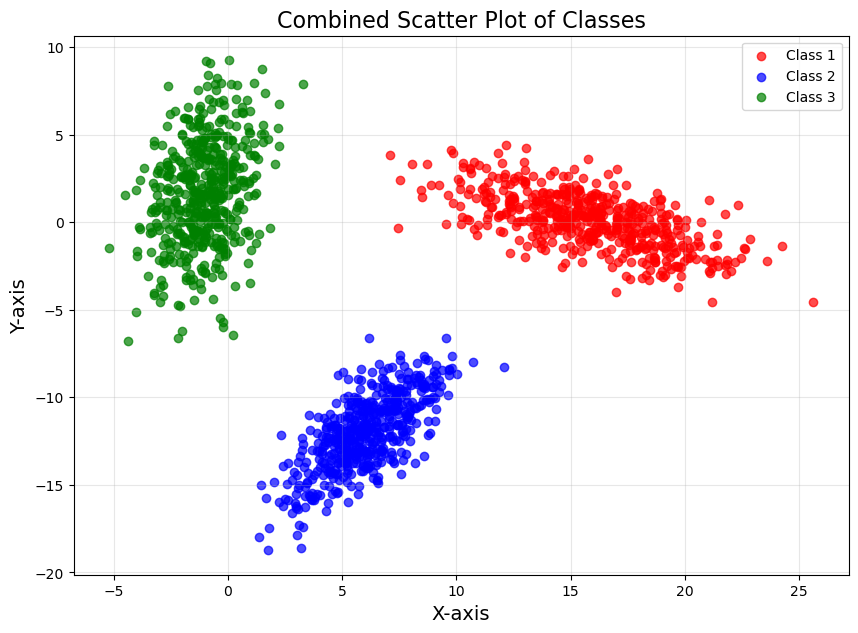


Predicted class for the random point [  4.2059 -13.722 ]: 1.0


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

# Load datasets with space delimiter
class1 = pd.read_csv('desktop/internship/dataset/LS_Data/class1.txt', delimiter=' ', header=None)
class1.columns = ['X', 'Y']
class2 = pd.read_csv('desktop/internship/dataset/LS_Data/class2.txt', delimiter=' ', header=None)
class2.columns = ['X', 'Y']
class3 = pd.read_csv('desktop/internship/dataset/LS_Data/class3.txt', delimiter=' ', header=None)
class3.columns = ['X', 'Y']

# Combine the datasets
combined_dataset = pd.concat([class1, class2, class3], ignore_index=True)

# Scatter plot for classes
plt.figure(figsize=(10, 7))

plt.scatter(class1['X'], class1['Y'], color='red', label='Class 1', alpha=0.7)
plt.scatter(class2['X'], class2['Y'], color='blue', label='Class 2', alpha=0.7)
plt.scatter(class3['X'], class3['Y'], color='green', label='Class 3', alpha=0.7)

plt.title("Combined Scatter Plot of Classes", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Features and labels
X = combined_dataset[['X', 'Y']]  # Features (X and Y)
y = np.concatenate([np.zeros(len(class1)), np.ones(len(class2)), np.full(len(class3), 2)])  # Labels: Class 1, 2, 3

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to calculate Euclidean distances between a random point and dataset
def euclidean_distances(X_train, random_point):
    distances = []  # To store calculated distances
    for _, row in X_train.iterrows():
        row_point = row.values  # Convert row to NumPy array
        distance = np.sqrt(np.sum((row_point - random_point) ** 2))  # Euclidean formula
        distances.append(distance)  # Append result to distances
    return np.array(distances)

# Calculate distances array
random_point = X.sample(n=1).values.flatten()  # Select a random point from X
distance_array = euclidean_distances(X[['X', 'Y']], random_point)

# k-NN function to predict the class of the random point
class KNN:
    def __init__(self, k=7):
        self.k = k  # Number of neighbors
    
    # Fit the model
    def fit(self, X_train, y_train):
        self.X_train = X_train  # Store training data
        self.y_train = y_train  # Store training labels
        
    # Predict the class of a given data point
    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return predictions
    
    # Predict the class for a single data point
    def _predict(self, x):
        distances = euclidean_distances(self.X_train, x)  # Calculate distances
        k_indices = np.argsort(distances)[:self.k]  # Get indices of k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]  # Get labels of nearest neighbors
        most_common = Counter(k_nearest_labels).most_common(1)  # Get the most common label
        return most_common[0][0]

# Initialize and train k-NN classifier
knn = KNN(k=7)
knn.fit(X_train, y_train)

# Predict the class for the random point
predicted_class = knn.predict([random_point])  
print(f"\nPredicted class for the random point {random_point}: {predicted_class[0]}")


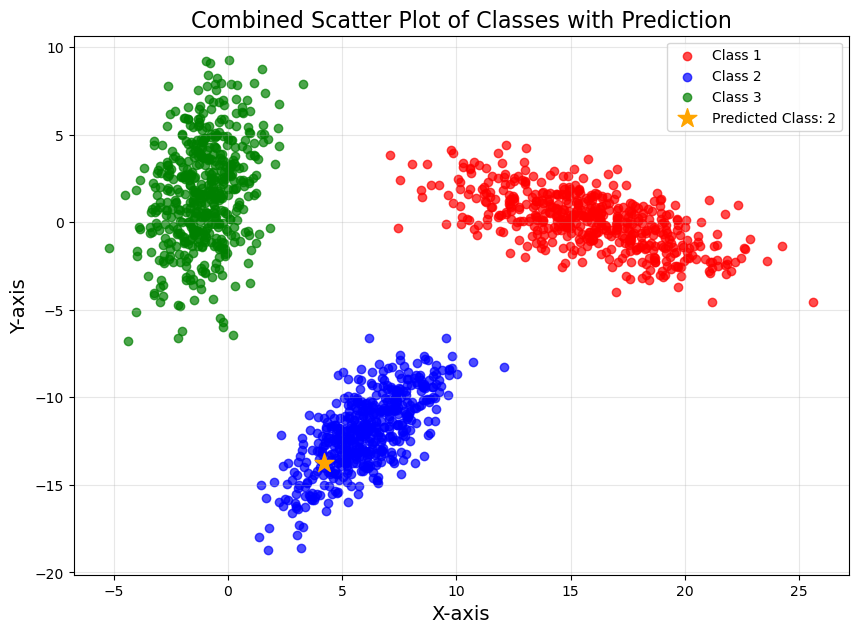

In [2]:
# Visualize the result
plt.figure(figsize=(10, 7))

# Scatter for class1
plt.scatter(class1['X'], class1['Y'], color='red', label='Class 1', alpha=0.7)

# Scatter for class2
plt.scatter(class2['X'], class2['Y'], color='blue', label='Class 2', alpha=0.7)

# Scatter for class3
plt.scatter(class3['X'], class3['Y'], color='green', label='Class 3', alpha=0.7)

# Mark the random point with a different color and label it with the predicted class
if predicted_class[0] == 0:
    plt.scatter(random_point[0], random_point[1], color='black', marker='*', s=200, label='Predicted Class: 1')
elif predicted_class[0] == 1:
    plt.scatter(random_point[0], random_point[1], color='orange', marker='*', s=200, label='Predicted Class: 2')
else:
    plt.scatter(random_point[0], random_point[1], color='purple', marker='*', s=200, label='Predicted Class: 3')

# Add labels, title, legend, and grid
plt.title("Combined Scatter Plot of Classes with Prediction", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()


In [ ]:
x_min, x_max = X['X'].min() - 1, X['X'].max() + 1
y_min, y_max = X['Y'].min() - 1, X['Y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict the class for each point in the grid
grid_predictions = knn.predict(grid_points)
grid_predictions = np.array(grid_predictions).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, grid_predictions, alpha=0.3)
plt.scatter(class1['X'], class1['Y'], color='red', label='Class 1', alpha=0.7)
plt.scatter(class2['X'], class2['Y'], color='blue', label='Class 2', alpha=0.7)
plt.scatter(class3['X'], class3['Y'], color='green', label='Class 3', alpha=0.7)
plt.scatter(random_point[0], random_point[1], color='black', marker='x', label='Random Point', s=100)
plt.title("K-NN Classification with Decision Boundaries", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()